# Solving A Principal Agent model for Insurance 

In this project we will attempt to solve a principal agent problem for insurance. 

In the principal agent problem we have a principal(insurance company) who offers an insurance contract to the agent(consumer). The principal will want to maximize his expected profit, however he also has to take into consideration, that it needs to be beneficial for the agent to accept the contract. 

We will setup and solve the model analytically and numerically. We will also extend the model to include selvrisk for the agent, and see how this changes the outcome of the maximization problem. 

Imports and set magics:

In [1]:
import numpy as np
from scipy import optimize
import sympy as sm
import matplotlib.pyplot as plt
plt.rcParams.update({"axes.grid":True,"grid.color":"black","grid.alpha":"0.25","grid.linestyle":"--"})
plt.rcParams.update({'font.size': 14})

# autoreload modules when code is run
%load_ext autoreload
%autoreload 2

# local modules
import modelproject

# Model description

# Principal Agent model with Insurance I

The agent is a consumer whos utility depends on consumption $c$ given by the utility function $v(c)$.  
The agents consumption depends on income $M$ and whether or not he experiences "accidents". 

If the agent experiences accidents he loses a portion of his income denoted by $L$

with probability $\pi$ he experiences an accident and gets: 

$$
c = M - L
$$

with probability $(1-\pi)$ he does not experience accidents and gets: 

$$
c = M
$$

The principal is an insurance company, that sells insurances with a price $\Gamma$ and payment of $K$;

The agent pays the price and following scenarios can happen;

with probability of $\pi$ the agent experiences an accident and loses $L$, but gets the insurance payment of $K$, Thus

$$
c = M - \Gamma - L + K
$$

with probability 1-$\pi$ the agent does not experience accidents and gets: 

$$
c = M - \Gamma 
$$

The agent has two options,

To sign the insurance contract with the principal, or to choose the outside option denoted by $\overline{v}$

$$
\overline{v} = \pi * v(M-L) + (1-\pi) * v(M)
$$

we assume the agent maximizes utility and we assume $v' > 0$ and $v'' < 0$,
which means that the agent likes to consume and would like to avoid risks. 

We also assume that the principal maximizes expected utility. 

We can now write up our principal agent problem, where $\Gamma - K$ is profit for the principal without accidents and $\Gamma$ is the profit without accidents.
$$
\max_{\Gamma, K} \pi * (\Gamma - K) + (1-\pi) * \Gamma\\

s.t. \\


\pi * v(M - \Gamma - L + K) + (1 - \pi) * v(M - \Gamma) \underline{>} \overline{v}
$$ 

The contraint ensures that the agents utility by accepting the insurance contract is atleast as big as the utility he gets from choosing the outside option, when the function is maximized. 

## Analytical solution

If your model allows for an analytical solution, you should provide here.

You may use Sympy for this. Then you can characterize the solution as a function of a parameter of the model.

To characterize the solution, first derive a steady state equation as a function of a parameter using Sympy.solve and then turn it into a python function by Sympy.lambdify. See the lecture notes for details. 

First we will solve the model analytically by the use of Sympy.

We start by defining $c_1 = M - \Gamma$ as consumption with out accident and $c_2 = M - \Gamma - L + K$ as consumption with accident.

Note that if we choose a particular $\Gamma$ and $K$ we can find $c_1$ and $c_2$ directly, and vice versa if we choose a particular $c_1$ and $c_2$.

Thereby we can express the principal-Agent problem as following, 
$$
\max_{c_1,c_2} M - \pi \cdot L - (1-\pi)c_1 - \pi c_2 \\
s.t. \\
\pi \cdot v(c_2) + (1-\pi) \cdot v(c_1) \geq \overline{v} 
$$

In [2]:
from modelproject import define_symbols, calculate_derivatives, solve_equations

# Defines symbols
L, M, pi, c_1, c_2, lam, v_overline, v = define_symbols()

# calculates derivatives and formulates equations
principal, condition, lagrange, Lc_1, Lc_2, Llam, v_diff_c1, v_diff_c2 = calculate_derivatives(L, M, pi, c_1, c_2, lam, v_overline, v)

#passer 

1. We see that the second order condition must be binding
$$
\pi \cdot v(c_2) + (1-\pi) \cdot v(c_1) = \overline{v} 
$$
2. and then we solve the problem using lagrange.

In [3]:
print('L = ')
display(lagrange)

L = 


-L*pi + M - c_1*(1 - pi) - c_2*pi + lambda*(-\overline{v} + pi*v(c_2) + (1 - pi)*v(c_1))

Imports and set magics:

Find the first order derivatives

In [4]:
display(Lc_1)
display(Lc_2)
display(Llam)

Eq(0, lambda*(1 - pi)*Derivative(v(c_1), c_1) + pi - 1)

Eq(0, lambda*pi*Derivative(v(c_2), c_2) - pi)

Eq(0, -\overline{v} + pi*v(c_2) + (1 - pi)*v(c_1))

We solve for $\frac{d}{dc_1}v(c_1)$ and $\frac{d}{dc_2}v(c_2)$

In [5]:
# Solve the system of equations
solution = solve_equations(Lc_1, Lc_2, Llam, v_diff_c1, v_diff_c2)

# check for a solution
if isinstance(solution, dict):
    for var, sol in solution.items():
        eq = sm.Eq(var, sol)
        display(eq)
elif isinstance(solution, list) and solution:
    for sol in solution:
        display(sol)
else:
    print("No solutions found.")

Eq(Derivative(v(c_1), c_1), 1/lambda)

Eq(Derivative(v(c_2), c_2), 1/lambda)

Meaning that optimal contract includes that $c_1 = c_2$. Since $c_1 = M - \Gamma$ we can write $c_2 = M - \Gamma - L + K \Leftrightarrow c_2 = c_1 - L + K \Leftrightarrow L = c_1 - c_2 + K$ which means that $L = K$.
This means that the ensurance payout from the principal to the agent needs to be as large as the loss the agent experiences, when he has an accident. 

To check if our analytical solution is correct we will solve the model numerically by the use of an optimization algorithm.

## Numerical solution

In order to solve the model numerically we define the parameters of the model which we have chosen arbitrarily. 

Then we define the principal agent problem by including a minus infront of our function. 

Then we use the optimization algorithm optimize.minimize to minimize the profit of the principal, effectively maximizing it since we have turned it into a negative.

In [6]:
# Import the class from the module
from modelproject import numerical_solution

# Create an instance of the class
num_sol = numerical_solution()

# Run the optimization
num_sol.run_optimization()

# Print the results
num_sol.print_results()

Optimal values:
For pi = 0.10, K: 5.00, gamma: 0.51
For pi = 0.20, K: 5.00, gamma: 1.01
For pi = 0.30, K: 5.00, gamma: 1.52
For pi = 0.40, K: 5.00, gamma: 2.02
For pi = 0.50, K: 5.00, gamma: 2.52
For pi = 0.60, K: 5.00, gamma: 3.02
For pi = 0.70, K: 5.00, gamma: 3.52
For pi = 0.80, K: 5.00, gamma: 4.01
For pi = 0.90, K: 5.00, gamma: 4.51


In [7]:
# Extract results for plotting
pi_values_t = [res[0] for res in num_sol.results]
gamma_values_t = [res[2] for res in num_sol.results if res[1] is not None and res[2] is not None]
K_values_t = [res[1] for res in num_sol.results if res[1] is not None and res[2] is not None]

From solving our model we can again see that K = L. We can also see that the larger the chance for an accident is (defined by pi), the bigger the insurance price must be. 

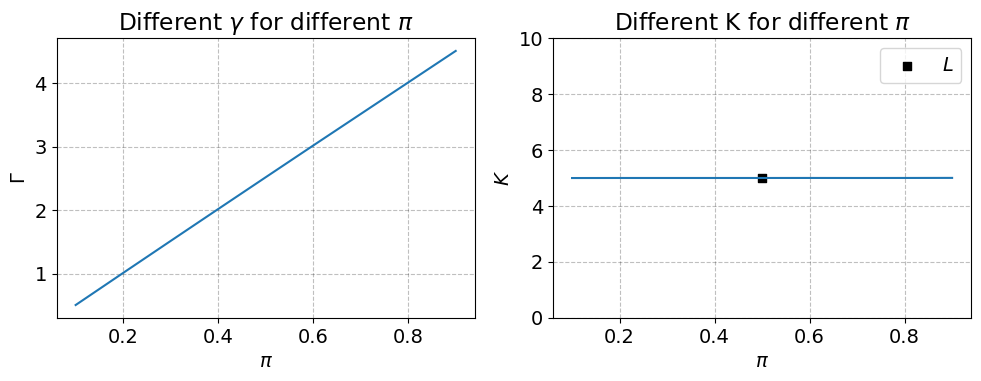

In [8]:
fig = plt.figure(figsize=(10,4))

# First subplot for gamma vs pi
ax = fig.add_subplot(1,2,1)
ax.plot(pi_values_t, gamma_values_t, linestyle='-')  # Make sure you have these lists ready from your results
ax.set_xlabel('$\pi$')
ax.set_ylabel('$\Gamma$')
ax.set_title('Different $\gamma$ for different $\pi$')

# Second subplot for K vs pi
ax2 = fig.add_subplot(1,2,2)
ax2.plot(pi_values_t, K_values_t, linestyle='-')  # Assuming you have these lists from your optimization results
ax2.scatter(0.5, 5, marker='s', color='black', label='$L$')  # Example, adjust 'L' as needed
ax2.set_xlabel('$\pi$')
ax2.set_ylabel('$K$')
ax2.set_title('Different K for different $\pi$')
ax2.set_ylim([0, 10])

# Include legend if necessary
ax2.legend()

fig.tight_layout(pad=1.0)
plt.show()

# Further analysis

We now extend our modul to account for the fact that the insurance company cannot observe whether or not the agent is careful or not. The insurance company would ideally like to formulate one type of contract to a careless agent, and one type of contract to a careful agent. 

But how does the insurance company know, that the careful contract which has a lower price than the careless one, is gonna be upheld by the supposed careful agent? 

They do by structuring the contract, so that the value of being a careful agent subsides the cost of being a careful agent. 

$$
\max_{c_1,c_2} M - \pi \cdot L - (1-\pi)c_1 - \pi c_2 \\
s.t. \\
\pi \cdot v(c_2) + (1-\pi) \cdot v(c_1) - e \geq \overline{v} \\

(\pi_s - \pi) \cdot (v(c_1) - v(c_2)) \geq e 
$$

where $\pi_s$ defined the probability of an accident happening if you are careless, and e being the cost of being careful. 



In [26]:
# Import the class from the module
from modelproject import further_analysis

# Create an instance of the class
fa = further_analysis()

# Run the optimization
fa.run_optimization()

# Print the results
fa.print_results()

Optimal values:
For e = 0.01, K: 4.92, gamma: 0.47
For e = 0.01, K: 4.90, gamma: 0.46
For e = 0.02, K: 4.87, gamma: 0.44
For e = 0.02, K: 4.85, gamma: 0.43
For e = 0.02, K: 4.83, gamma: 0.42
For e = 0.02, K: 4.81, gamma: 0.41
For e = 0.03, K: 4.78, gamma: 0.40
For e = 0.03, K: 4.76, gamma: 0.39
For e = 0.03, K: 4.74, gamma: 0.38
For e = 0.04, K: 4.71, gamma: 0.36
For e = 0.04, K: 4.69, gamma: 0.35
For e = 0.04, K: 4.67, gamma: 0.34
For e = 0.04, K: 4.65, gamma: 0.33
For e = 0.05, K: 4.62, gamma: 0.32
For e = 0.05, K: 4.60, gamma: 0.31
For e = 0.05, K: 4.58, gamma: 0.30
For e = 0.06, K: 4.55, gamma: 0.28
For e = 0.06, K: 4.53, gamma: 0.27
For e = 0.06, K: 4.51, gamma: 0.26
For e = 0.06, K: 4.49, gamma: 0.25
For e = 0.07, K: 4.46, gamma: 0.24
For e = 0.07, K: 4.44, gamma: 0.23
For e = 0.07, K: 4.42, gamma: 0.22
For e = 0.08, K: 4.40, gamma: 0.20
For e = 0.08, K: 4.37, gamma: 0.19
For e = 0.08, K: 4.35, gamma: 0.18
For e = 0.08, K: 4.33, gamma: 0.17
For e = 0.09, K: 4.30, gamma: 0.16
For 

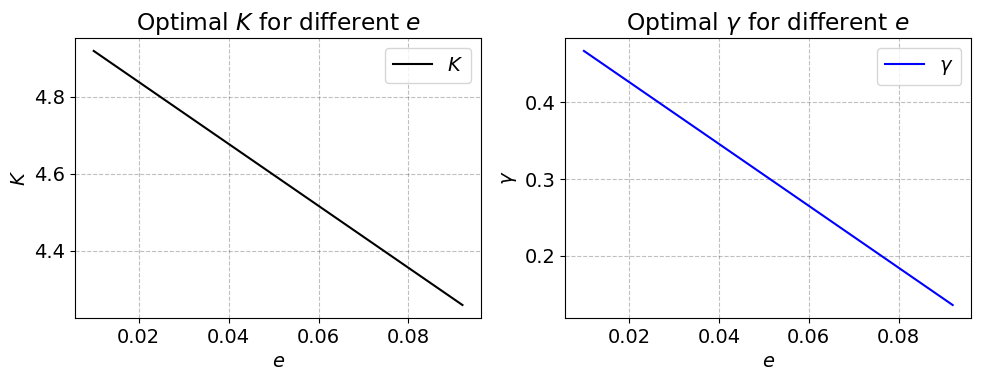

In [27]:
# Plot the results
fig = plt.figure(figsize=(10, 4))

# First subplot for K vs e
ax1 = fig.add_subplot(1, 2, 1)
ax1.plot(fa.e_values, fa.K_values, linestyle='-', color='black', label='$K$')
ax1.set_xlabel('$e$')
ax1.set_ylabel('$K$')
ax1.set_title('Optimal $K$ for different $e$')
ax1.legend()

# Second subplot for gamma vs e
ax2 = fig.add_subplot(1, 2, 2)
ax2.plot(fa.e_values, fa.gamma_values, linestyle='-', color='blue', label='$\gamma$')
ax2.set_xlabel('$e$')
ax2.set_ylabel('$\gamma$')
ax2.set_title('Optimal $\gamma$ for different $e$')
ax2.legend()

fig.tight_layout(pad=1.0)
plt.show()

Now we see that the price of the insurance is lower than before when the contract forces the agent to be careful. We also see that the bigger the cost of being careful is, the lower the price of the insurance has to be. 

# Conclusion

From solving the principal agent model, we find that the payout (K) has to be equal to the loss (L) the agent can experience, in order for the contract to be accepted. We also derive from the model, that the price of the insurance increases when the chance for an accident increases. 

When we extended the model to include selvrisk (forcing the agent to be careful), we find that the payout (K) is now lower than the agents loss (L) when an accident accurs. We also find, that when the cost of being a careful agent (e) increases, the price of the insurance must fall in order for the agent to accept the contract. We lastly see that K also falls abit when e increases. 